In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('combined_jobs_no_duplicates.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     6173 non-null   object
 1   city          6105 non-null   object
 2   country       6105 non-null   object
 3   company_name  6172 non-null   object
 4   is_remote     6173 non-null   bool  
 5   date          6173 non-null   object
dtypes: bool(1), object(5)
memory usage: 247.3+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.head(4)

job_title         city  \
0   Global Mobility Intern, AI/ML 5G Advanced Modem     San Diego   
1  Software Intern, 5G RAN and AI Kubernetes orch...  Santa Clara   
2  Software Intern, 5G and 6G RAN AI with digital...  Santa Clara   
3                   Intern, AI/ML 5G Advanced Modem     San Diego   

         country          company_name  is_remote        date  
0  United States  samsungsemiconductor      False  2024-03-16  
1  United States                Nvidia      False  2023-12-02  
2  United States                Nvidia      False  2023-11-22  
3  United States  samsungsemiconductor      False  2023-11-14

In [6]:
df.shape

(6173, 6)

In [6]:
df['job_title'].unique()


array(['Global Mobility Intern, AI/ML 5G Advanced Modem\xa0',
       'Software Intern, 5G RAN and AI Kubernetes orchestration - Summer 2024',
       'Software Intern, 5G and 6G RAN AI with digital twin - Summer 2024',
       ..., '[Job 14419 - CoH] Sr Data Engineer',
       'Portfolio Data Analyst Sr. Advisor - Evernorth Health Services - Hybrid',
       '[Job 14419 - CoH] Data Analyst SR'], dtype=object)

In [9]:
df.to_csv('combined_jobs_no_duplicates.csv', index=False)


In [7]:
import re

# Define a function to categorize job titles
def categorize_job_title(title):
    title = title.lower()
    
    # Software and Cloud Engineering
    if re.search(r'software|developer|devops|cloud|kubernetes|orchestration|full stack|backend|frontend', title):
        return 'Software & Cloud Engineering'
    
    # Firmware and Embedded Systems
    elif re.search(r'firmware|embedded|hardware', title):
        return 'Firmware & Embedded Systems'
    
    # Data Science and Analytics
    elif re.search(r'data science|data analyst|data scientist|big data|data analytics', title):
        return 'Data Science & Analytics'
    
    # Data Engineering
    elif re.search(r'data engineer|etl|pipeline|data architecture|data engineering', title):
        return 'Data Engineering'
    
    # Machine Learning and AI
    elif re.search(r'machine learning|ml|ai|artificial intelligence|deep learning|nlp|vision', title):
        return 'Machine Learning & AI'
    
    # Telecom and 5G/6G Engineering
    elif re.search(r'5g|6g|telecom|modem|cellular|wireless', title):
        return 'Telecom & 5G/6G Engineering'
    
    # Algorithm and Signal Processing
    elif re.search(r'algorithm|signal processing|gnss|radar|gnc|signal processing', title):
        return 'Algorithm & Signal Processing'
    
    # RF and Wireless Engineering
    elif re.search(r'rf|radio frequency|antenna|wireless', title):
        return 'RF & Wireless Engineering'
    
    # System Engineering
    elif re.search(r'system engineer|systems engineering|infrastructure|system design', title):
        return 'Systems Engineering'
    
    # Actuarial Science
    elif re.search(r'actuary|actuarial|pension|insurance|risk management', title):
        return 'Actuarial Science & Risk Management'
    
    # Management and Leadership
    elif re.search(r'director|manager|chief|lead|executive|vp|head', title):
        return 'Management & Leadership'
    
    # Consulting and Advisory
    elif re.search(r'consultant|consulting|advisor|advisory', title):
        return 'Consulting & Advisory'
    
    # Finance and Treasury
    elif re.search(r'finance|treasury|accounting|financial services', title):
        return 'Finance & Treasury'
    
    # Research and Development
    elif re.search(r'research|development|r&d', title):
        return 'Research & Development'
    
    # Internships and Trainee
    elif re.search(r'intern|internship|trainee', title):
        return 'Internships & Trainee'
    
    # Cybersecurity
    elif re.search(r'security|cybersecurity|infosec', title):
        return 'Cybersecurity'
    
    # Product and Project Management
    elif re.search(r'product manager|project manager|program management', title):
        return 'Product & Project Management'
    
    # Other
    else:
        return 'Other'

# Apply the categorization to the job_title column
df['job_category'] = df['job_title'].apply(categorize_job_title)

# Display the new categorized dataframe and some job categories
df[['job_title', 'job_category']].head(20)

job_title  \
0    Global Mobility Intern, AI/ML 5G Advanced Modem    
1   Software Intern, 5G RAN and AI Kubernetes orch...   
2   Software Intern, 5G and 6G RAN AI with digital...   
3                    Intern, AI/ML 5G Advanced Modem    
4   Staff Software / Firmware Engineer - 5G, AI/ML...   
5                Principal Algorithm Engineer (5G/6G)   
6                      Principal 5G RAN Data Engineer   
7   Senior Engineer, 5G/6G – Advanced Algorithms, ...   
8   5G Wireless Big Data & ML Senior Engineer - Co...   
9      Senior Staff Engineer, 5G RF System Algorithm    
10     Senior Staff Engineer, 5G RF System Algorithm    
11                            5G Data Science Analyst   
12           5G RF Systems Algorithms Engineer Intern   
13  Modem Systems Engineer (5G/6G – Advanced Algor...   
14                           5G Senior Data Scientist   
15  Cellular Modem RF Systems Engineer (5G FR2/Rad...   
16                   Summer Internship 2025 - Actuary   
17                                  Director, Actuary   
18  Manager - Financial Services &amp; Treasury- N...   
19      Actuary Intern- Stevens Point, WI Summer 2025   

                           job_category  
0                 Machine Learning & AI  
1          Software & Cloud Engineering  
2          Software & Cloud Engineering  
3                 Machine Learning & AI  
4          Software & Cloud Engineering  
5           Telecom & 5G/6G Engineering  
6                      Data Engineering  
7                 Machine Learning & AI  
8              Data Science & Analytics  
9           Telecom & 5G/6G Engineering  
10          Telecom & 5G/6G Engineering  
11             Data Science & Analytics  
12          Telecom & 5G/6G Engineering  
13                Machine Learning & AI  
14             Data Science & Analytics  
15                Machine Learning & AI  
16  Actuarial Science & Risk Management  
17  Actuarial Science & Risk Management  
18                Machine Learning & AI  
19  Actuarial Science & Risk Management

In [8]:
df.head(4)

job_title         city  \
0   Global Mobility Intern, AI/ML 5G Advanced Modem     San Diego   
1  Software Intern, 5G RAN and AI Kubernetes orch...  Santa Clara   
2  Software Intern, 5G and 6G RAN AI with digital...  Santa Clara   
3                   Intern, AI/ML 5G Advanced Modem     San Diego   

         country          company_name  is_remote        date  \
0  United States  samsungsemiconductor      False  2024-03-16   
1  United States                Nvidia      False  2023-12-02   
2  United States                Nvidia      False  2023-11-22   
3  United States  samsungsemiconductor      False  2023-11-14   

                   job_category  
0         Machine Learning & AI  
1  Software & Cloud Engineering  
2  Software & Cloud Engineering  
3         Machine Learning & AI

In [9]:
def shorten_job_title(title):
    # Remove any text after a comma, dash, or parentheses
    title = re.split(r'[,-]', title)[0]
    
    # Remove common words, locations, dates, and seniority levels
    title = re.sub(r'\b(intern|internship|Internship|senior|Senior|staff|principal|junior|lead|head|director|manager|associate|assistant|vice president|vp|executive|chief|global mobility|summer \d+|wi|cork|remote|hybrid|Summer|fall|winter|spring|full-time|part-time|contract|consultant|trainee|advisor|team lead)\b', '', title, flags=re.IGNORECASE)
    
    # Remove specific locations or non-essential details
    title = re.sub(r'\b(new york|ny|ca|dublin|ireland|london|mumbai|singapore|australia|asia|germany|france|paris|england|usa|boston|china|europe)\b', '', title, flags=re.IGNORECASE)
    
    # Remove extra spaces and redundant terms
    title = re.sub(r'\b(remote|hybrid|onsite|offsite|junior|temp|contract|temporary|perm)\b', '', title, flags=re.IGNORECASE)
    
    # Remove anything inside square brackets or parentheses (e.g., [Job 14419 - CoH])
    title = re.sub(r'\[.*?\]|\(.*?\)', '', title)
    
    # Remove any text after a comma, dash, or parentheses
    title = re.split(r'[,-]', title)[0]
    
    # Remove multiple spaces and leading/trailing spaces
    title = re.sub(r'\s+', ' ', title).strip()
    
    return title

# Apply the function to shorten job titles
df['short_job_title'] = df['job_title'].apply(shorten_job_title)

# Display the shortened titles along with their categories
df[['job_title', 'short_job_title', 'job_category']].sample(20)

job_title  \
5070             Senior Engineer, Data and AI Platforms   
4807  Senior Machine Learning Engineer (Modeling) - ...   
5225                               Senior Data Engineer   
2559                             Principal Data Analyst   
293                           Insurance Pricing Actuary   
4499           Infrastructure and Data Engineering Lead   
2203  Senior Treasury Quantitative Analyst - Hybrid ...   
4006                                 Lead Data Engineer   
4689                     Senior Process Data Engineer-2   
3061  Campus - Data Science (Analytics and Modeling ...   
3084                 Senior Manager, AI & Data Platform   
5954    Sr Data Engineer IT Customer Data and Marketing   
401                                   Associate Actuary   
1696    Senior MLOps Engineer, Deep Learning Algorithms   
5492                                  Sr. Data Engineer   
1374                Staff Perception Algorithm Engineer   
1614    Algorithm Software Developer to Bosch Sensortec   
1499  STAGE – Ingénieur en analyse et implémentation...   
2948        Senior Back-end Developer - Computer Vision   
5549                          Sr Data Scientist - HR BU   

                                        short_job_title  \
5070                                           Engineer   
4807                          Machine Learning Engineer   
5225                                      Data Engineer   
2559                                       Data Analyst   
293                           Insurance Pricing Actuary   
4499                Infrastructure and Data Engineering   
2203                      Treasury Quantitative Analyst   
4006                                      Data Engineer   
4689                              Process Data Engineer   
3061                                             Campus   
3084                                                      
5954    Sr Data Engineer IT Customer Data and Marketing   
401                                             Actuary   
1696                                     MLOps Engineer   
5492                                  Sr. Data Engineer   
1374                      Perception Algorithm Engineer   
1614    Algorithm Software Developer to Bosch Sensortec   
1499  STAGE – Ingénieur en analyse et implémentation...   
2948                                               Back   
5549                                  Sr Data Scientist   

                             job_category  
5070                Machine Learning & AI  
4807                Machine Learning & AI  
5225                     Data Engineering  
2559             Data Science & Analytics  
293   Actuarial Science & Risk Management  
4499                     Data Engineering  
2203                   Finance & Treasury  
4006                     Data Engineering  
4689                     Data Engineering  
3061             Data Science & Analytics  
3084                Machine Learning & AI  
5954                     Data Engineering  
401   Actuarial Science & Risk Management  
1696                Machine Learning & AI  
5492                     Data Engineering  
1374        Algorithm & Signal Processing  
1614         Software & Cloud Engineering  
1499                Machine Learning & AI  
2948         Software & Cloud Engineering  
5549             Data Science & Analytics

In [10]:
df.head(4)

job_title         city  \
0   Global Mobility Intern, AI/ML 5G Advanced Modem     San Diego   
1  Software Intern, 5G RAN and AI Kubernetes orch...  Santa Clara   
2  Software Intern, 5G and 6G RAN AI with digital...  Santa Clara   
3                   Intern, AI/ML 5G Advanced Modem     San Diego   

         country          company_name  is_remote        date  \
0  United States  samsungsemiconductor      False  2024-03-16   
1  United States                Nvidia      False  2023-12-02   
2  United States                Nvidia      False  2023-11-22   
3  United States  samsungsemiconductor      False  2023-11-14   

                   job_category short_job_title  
0         Machine Learning & AI                  
1  Software & Cloud Engineering        Software  
2  Software & Cloud Engineering        Software  
3         Machine Learning & AI

In [11]:
df.isnull().sum()

job_title           0
city               68
country            68
company_name        1
is_remote           0
date                0
job_category        0
short_job_title     0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(6104, 8)

In [14]:
df.head(4)

job_title         city  \
0   Global Mobility Intern, AI/ML 5G Advanced Modem     San Diego   
1  Software Intern, 5G RAN and AI Kubernetes orch...  Santa Clara   
2  Software Intern, 5G and 6G RAN AI with digital...  Santa Clara   
3                   Intern, AI/ML 5G Advanced Modem     San Diego   

         country          company_name  is_remote        date  \
0  United States  samsungsemiconductor      False  2024-03-16   
1  United States                Nvidia      False  2023-12-02   
2  United States                Nvidia      False  2023-11-22   
3  United States  samsungsemiconductor      False  2023-11-14   

                   job_category short_job_title  
0         Machine Learning & AI                  
1  Software & Cloud Engineering        Software  
2  Software & Cloud Engineering        Software  
3         Machine Learning & AI

In [15]:
df.replace({'short_job_title': np.nan}, inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

job_title          0
city               0
country            0
company_name       0
is_remote          0
date               0
job_category       0
short_job_title    0
dtype: int64

In [21]:
df.shape

(6104, 8)

In [18]:
df.head(4)

job_title         city  \
0   Global Mobility Intern, AI/ML 5G Advanced Modem     San Diego   
1  Software Intern, 5G RAN and AI Kubernetes orch...  Santa Clara   
2  Software Intern, 5G and 6G RAN AI with digital...  Santa Clara   
3                   Intern, AI/ML 5G Advanced Modem     San Diego   

         country          company_name  is_remote        date  \
0  United States  samsungsemiconductor      False  2024-03-16   
1  United States                Nvidia      False  2023-12-02   
2  United States                Nvidia      False  2023-11-22   
3  United States  samsungsemiconductor      False  2023-11-14   

                   job_category short_job_title  
0         Machine Learning & AI                  
1  Software & Cloud Engineering        Software  
2  Software & Cloud Engineering        Software  
3         Machine Learning & AI

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

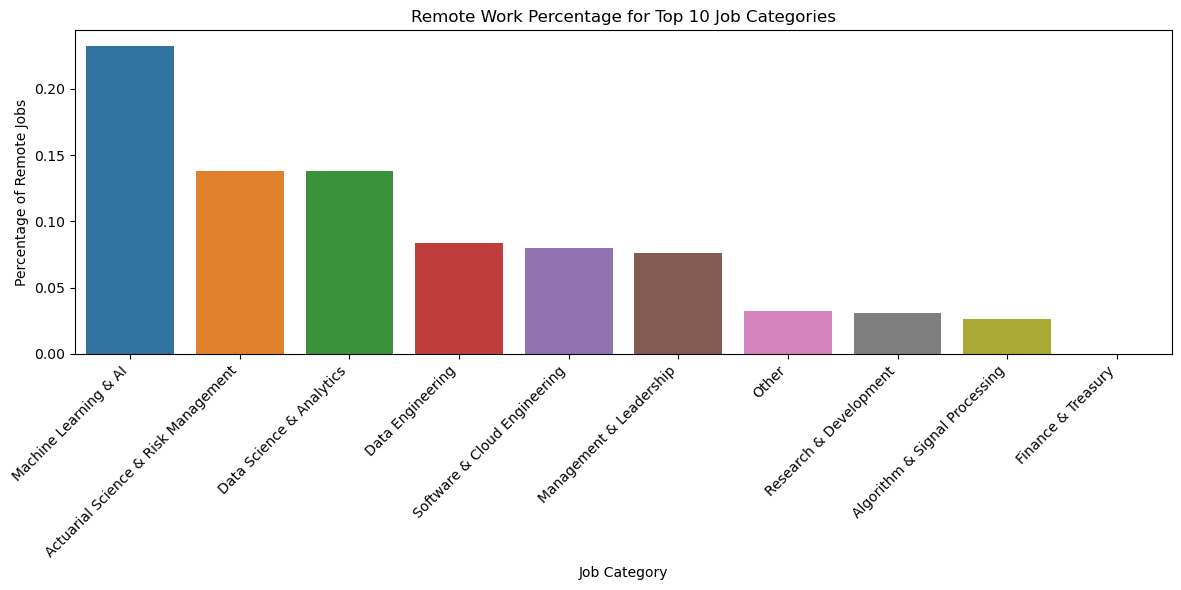

In [20]:
top_categories = df['job_category'].value_counts().head(10)
remote_percentages = df[df['job_category'].isin(top_categories.index)].groupby('job_category')['is_remote'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=remote_percentages.index, y=remote_percentages.values)
plt.title('Remote Work Percentage for Top 10 Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Percentage of Remote Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

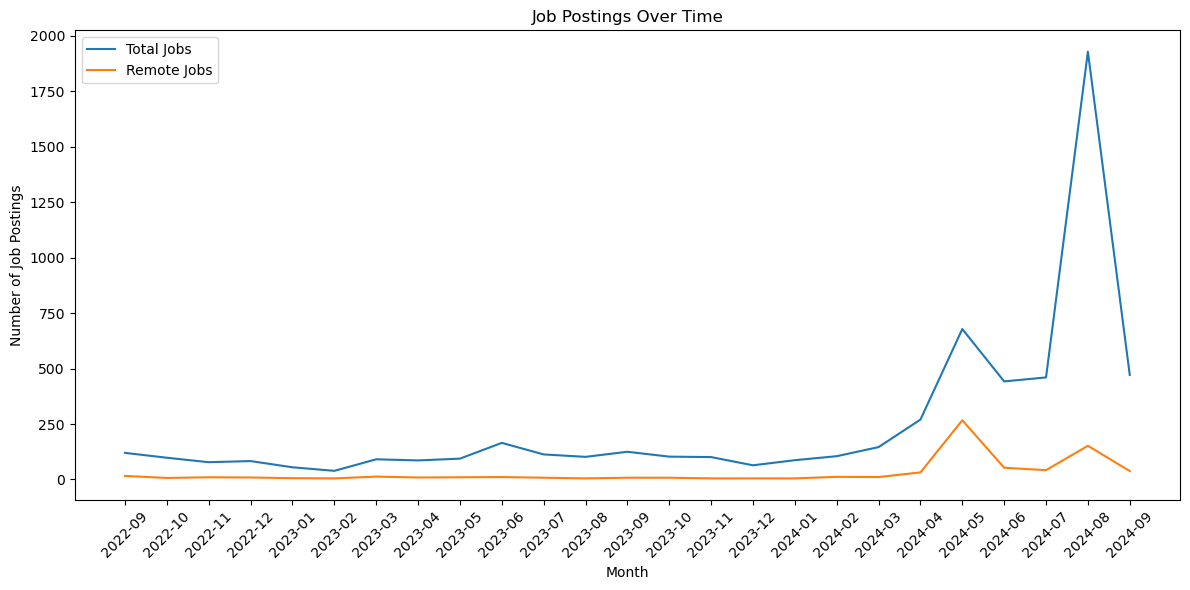

In [21]:
import warnings

# Suppress specific FutureWarning about 'use_inf_as_na'
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure invalid dates are handled

# Extract the month from the date
df['month'] = df['date'].dt.to_period('M')

# Convert infinite values to NaN and fill NaN with 0
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
df.fillna(0, inplace=True)

# Group data by month for total jobs and remote jobs
monthly_jobs = df.groupby('month').size()
monthly_remote = df[df['is_remote']].groupby('month').size()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_jobs.index.astype(str), y=monthly_jobs.values, label='Total Jobs')
sns.lineplot(x=monthly_remote.index.astype(str), y=monthly_remote.values, label='Remote Jobs')

plt.title('Job Postings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

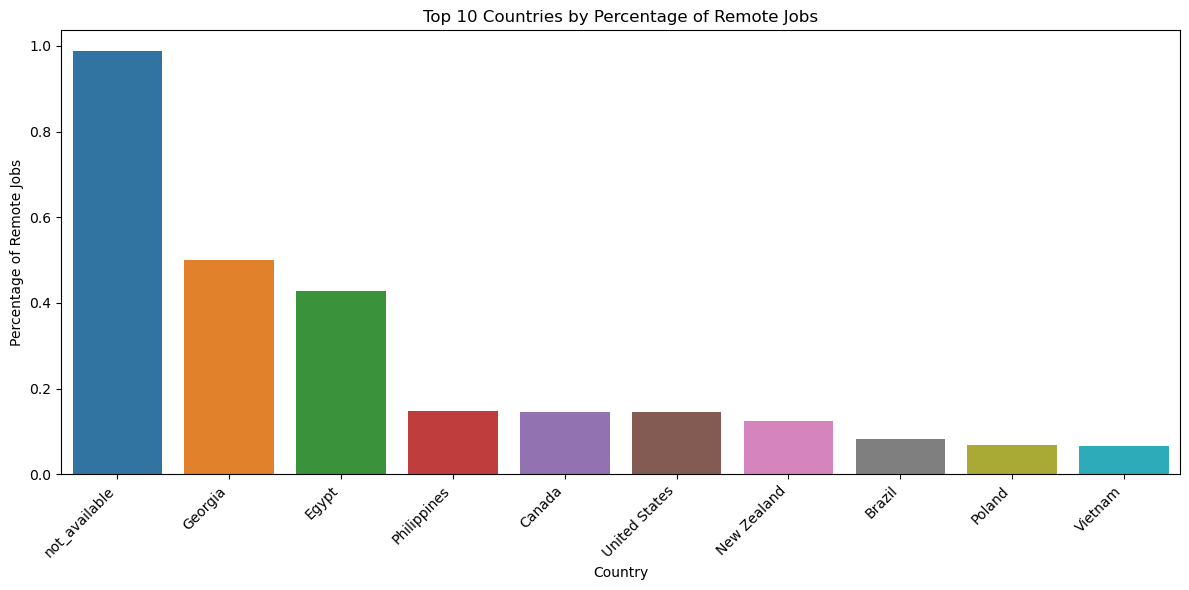

In [22]:
country_remote_pct = df.groupby('country')['is_remote'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_remote_pct.index, y=country_remote_pct.values)
plt.title('Top 10 Countries by Percentage of Remote Jobs')
plt.xlabel('Country')
plt.ylabel('Percentage of Remote Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

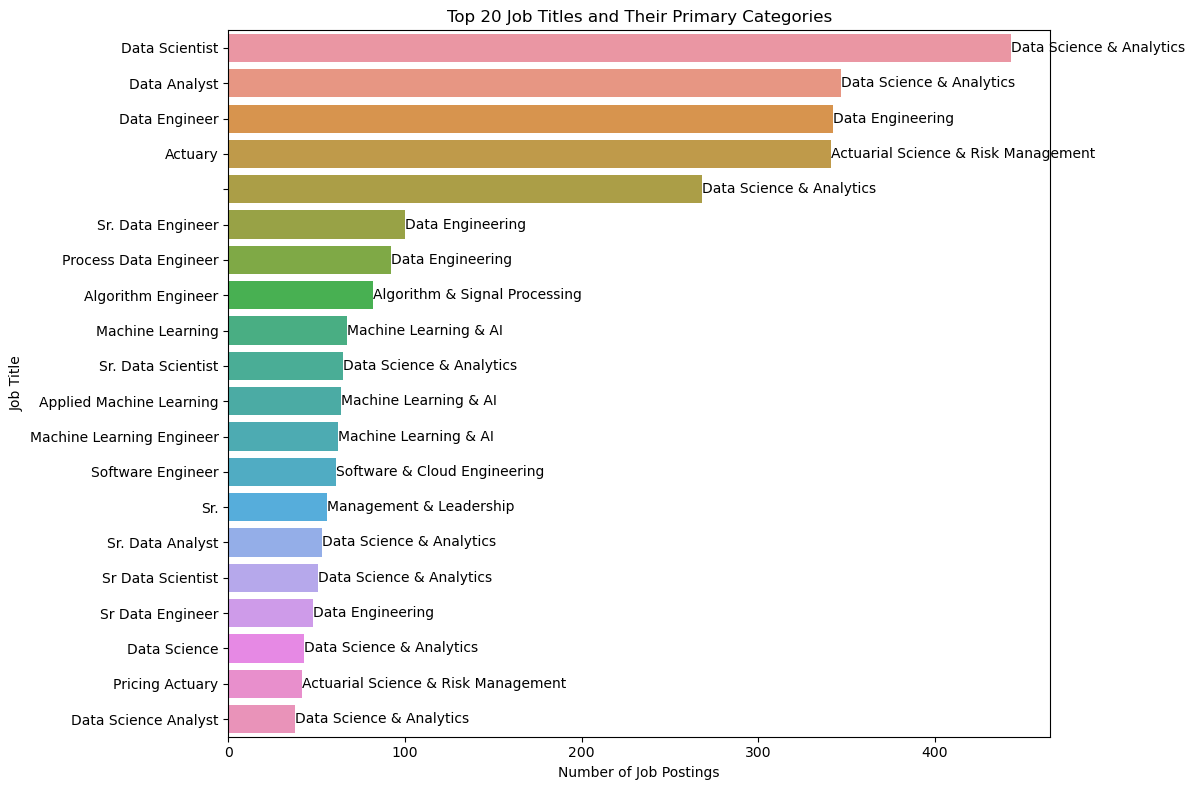

In [35]:
# Get the top 20 job titles by count
top_titles = df['short_job_title'].value_counts().head(20)

# Get the most frequent category for each job title in the top 20
title_category = df[df['short_job_title'].isin(top_titles.index)] \
    .groupby('short_job_title')['job_category'] \
    .agg(lambda x: x.value_counts().index[0])

# Align title_category with the top_titles order
title_category = title_category.reindex(top_titles.index)

plt.figure(figsize=(12, 8))

# Plot the barplot without hue first
sns.barplot(x=top_titles.values, y=top_titles.index)

# Overlay the hue as text annotations
for i, (value, category) in enumerate(zip(top_titles.values, title_category)):
    plt.text(value, i, f'{category}', va='center')

plt.title('Top 20 Job Titles and Their Primary Categories')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

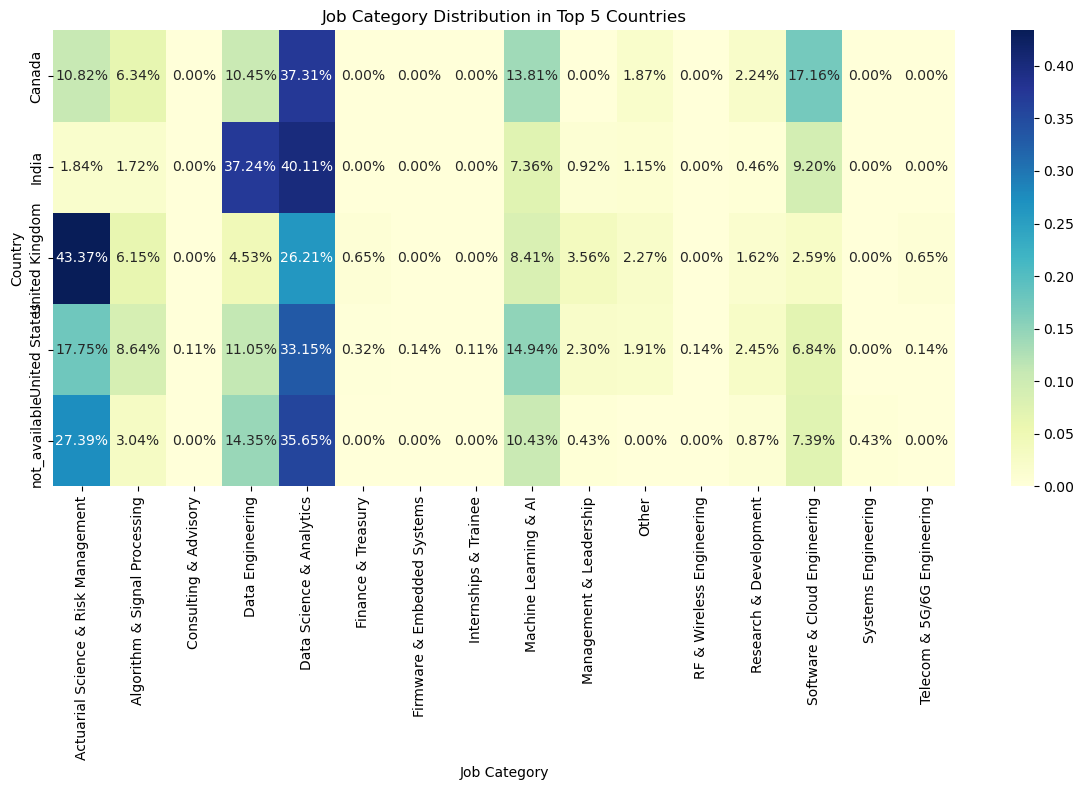

In [23]:
top_countries = df['country'].value_counts().head(5).index
country_category = df[df['country'].isin(top_countries)].groupby(['country', 'job_category']).size().unstack(fill_value=0)
country_category_pct = country_category.div(country_category.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(country_category_pct, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Job Category Distribution in Top 5 Countries')
plt.ylabel('Country')
plt.xlabel('Job Category')
plt.tight_layout()
plt.show()

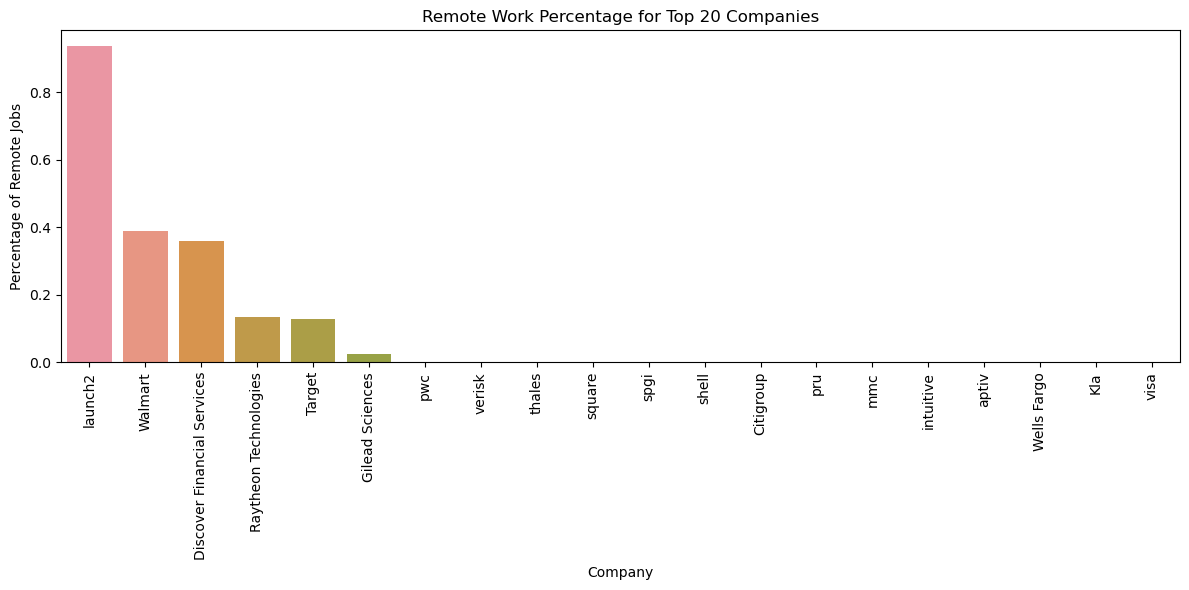

In [36]:
top_companies = df['company_name'].value_counts().head(20).index
company_remote = df[df['company_name'].isin(top_companies)].groupby('company_name')['is_remote'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=company_remote.index, y=company_remote.values)
plt.title('Remote Work Percentage for Top 20 Companies')
plt.xlabel('Company')
plt.ylabel('Percentage of Remote Jobs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

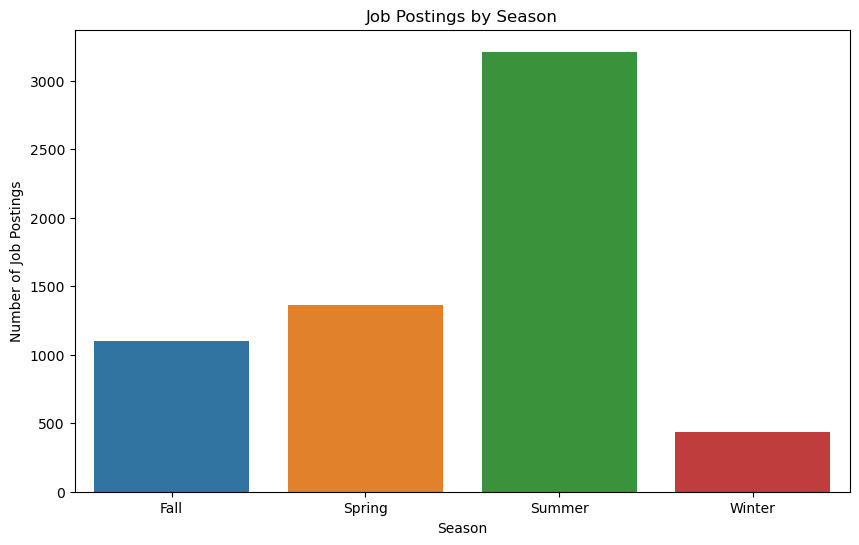

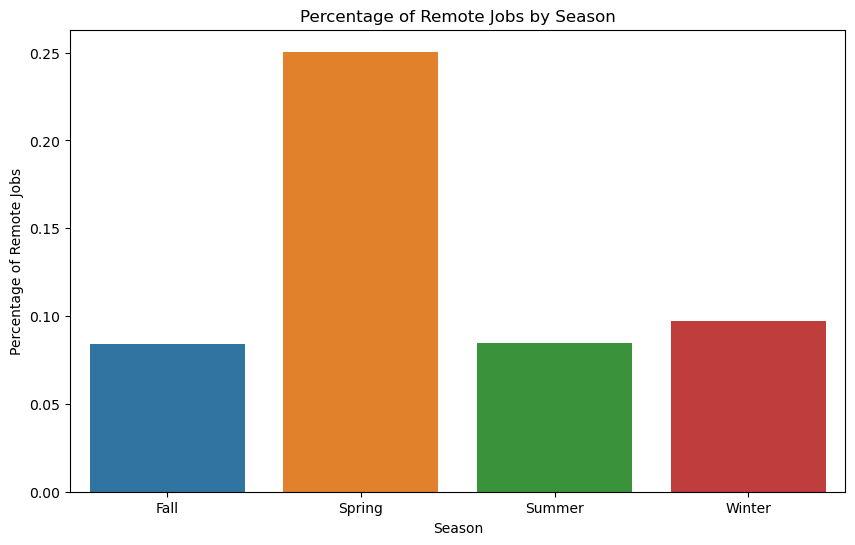

In [24]:
df['season'] = df['date'].dt.month.map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                        3: 'Spring', 4: 'Spring', 5: 'Spring',
                                        6: 'Summer', 7: 'Summer', 8: 'Summer',
                                        9: 'Fall', 10: 'Fall', 11: 'Fall'})

seasonal_jobs = df.groupby('season').size()
seasonal_remote = df[df['is_remote']].groupby('season').size() / seasonal_jobs

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_jobs.index, y=seasonal_jobs.values)
plt.title('Job Postings by Season')
plt.xlabel('Season')
plt.ylabel('Number of Job Postings')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_remote.index, y=seasonal_remote.values)
plt.title('Percentage of Remote Jobs by Season')
plt.xlabel('Season')
plt.ylabel('Percentage of Remote Jobs')
plt.show()

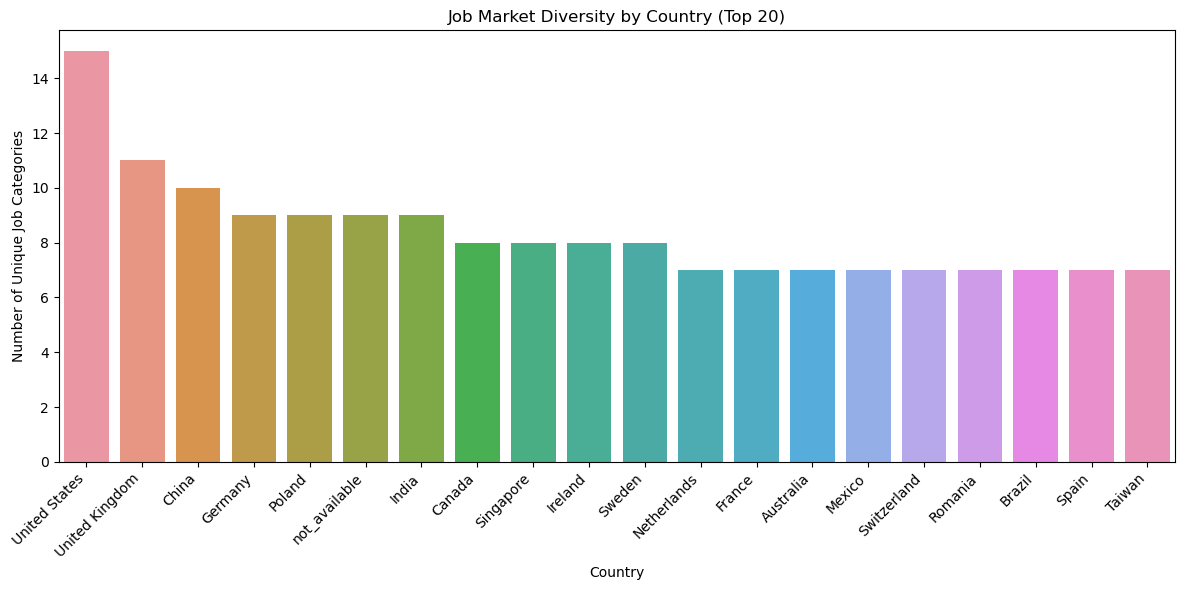

In [25]:
country_diversity = df.groupby('country')['job_category'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_diversity.head(20).index, y=country_diversity.head(20).values)
plt.title('Job Market Diversity by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Unique Job Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

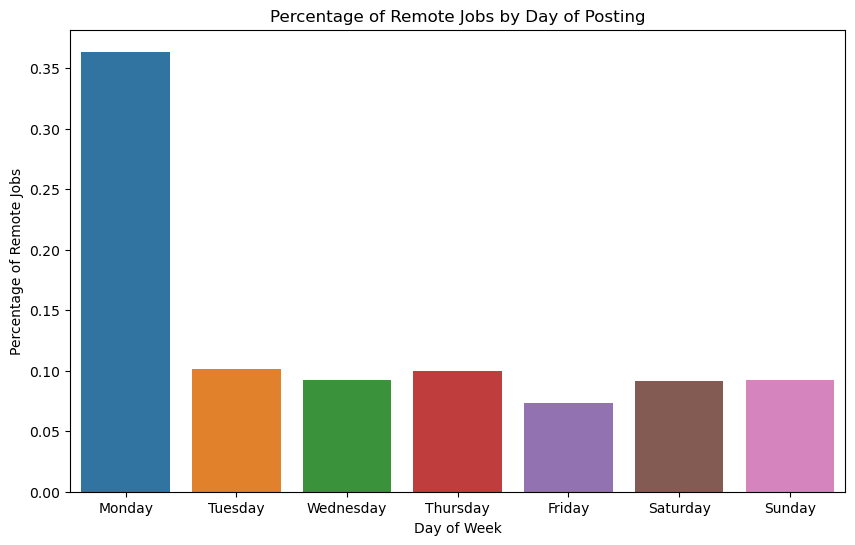

In [39]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
remote_by_day = df.groupby('day_of_week')['is_remote'].mean().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=remote_by_day.index, y=remote_by_day.values)
plt.title('Percentage of Remote Jobs by Day of Posting')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Remote Jobs')
plt.show()

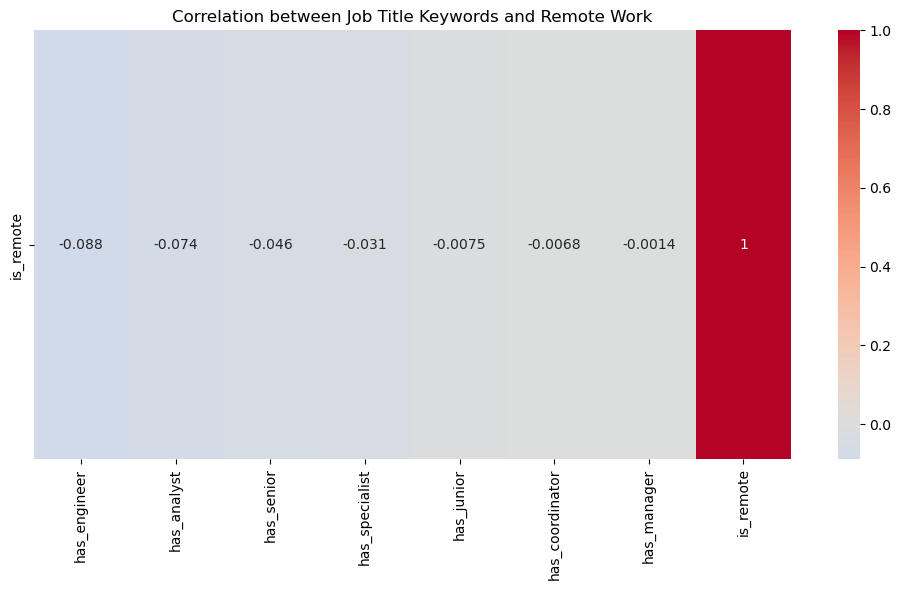

In [26]:
keywords = ['senior', 'junior', 'manager', 'engineer', 'analyst', 'specialist', 'coordinator']

for keyword in keywords:
    df[f'has_{keyword}'] = df['job_title'].str.contains(keyword, case=False, regex=True)

keyword_remote_corr = df[[f'has_{k}' for k in keywords] + ['is_remote']].corr()['is_remote'].sort_values()

plt.figure(figsize=(10, 6))
sns.heatmap(keyword_remote_corr.to_frame().transpose(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Job Title Keywords and Remote Work')
plt.tight_layout()
plt.show()

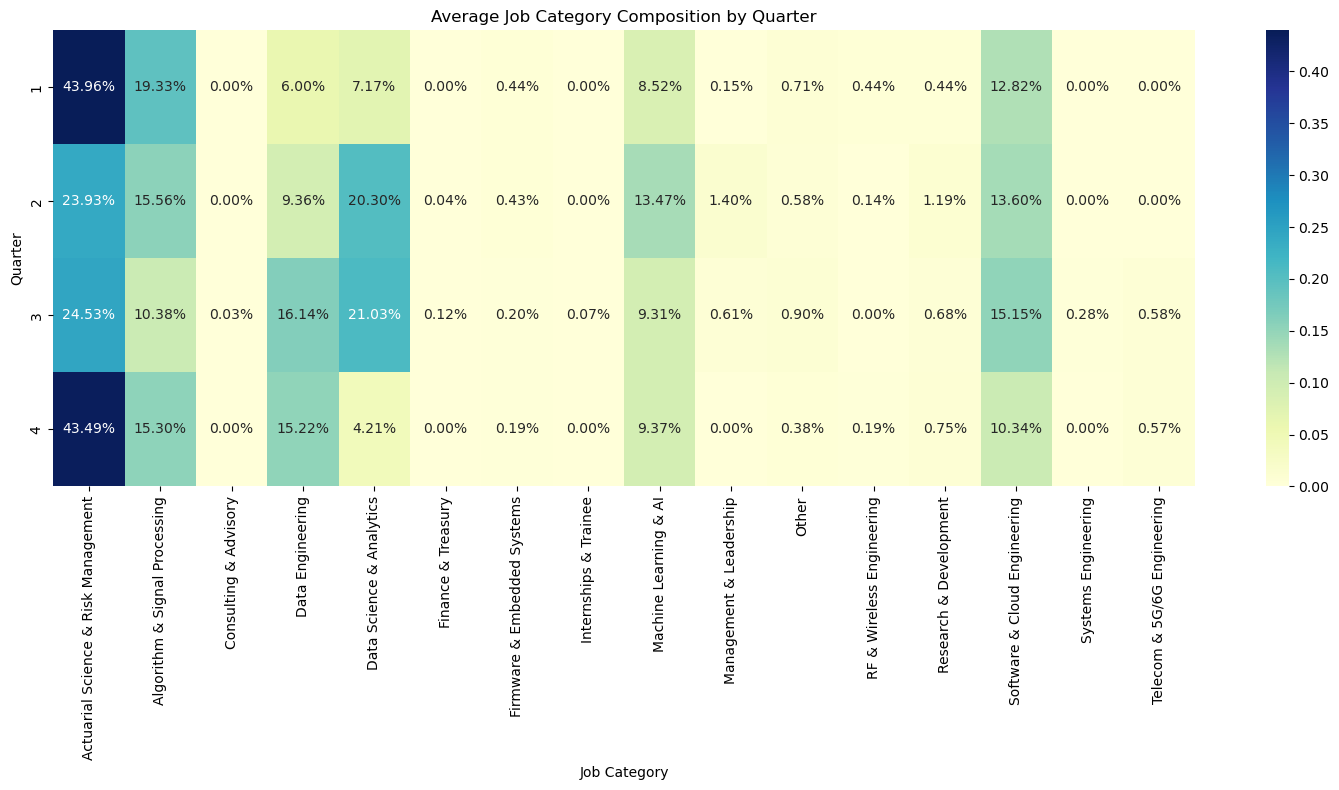

In [40]:
df['quarter'] = pd.to_datetime(df['date']).dt.quarter
df['year'] = pd.to_datetime(df['date']).dt.year

quarterly_composition = df.groupby(['year', 'quarter', 'job_category']).size().unstack(fill_value=0)
quarterly_composition_pct = quarterly_composition.div(quarterly_composition.sum(axis=1), axis=0)

plt.figure(figsize=(15, 8))
sns.heatmap(quarterly_composition_pct.groupby('quarter').mean(), annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Average Job Category Composition by Quarter')
plt.xlabel('Job Category')
plt.ylabel('Quarter')
plt.tight_layout()
plt.show()

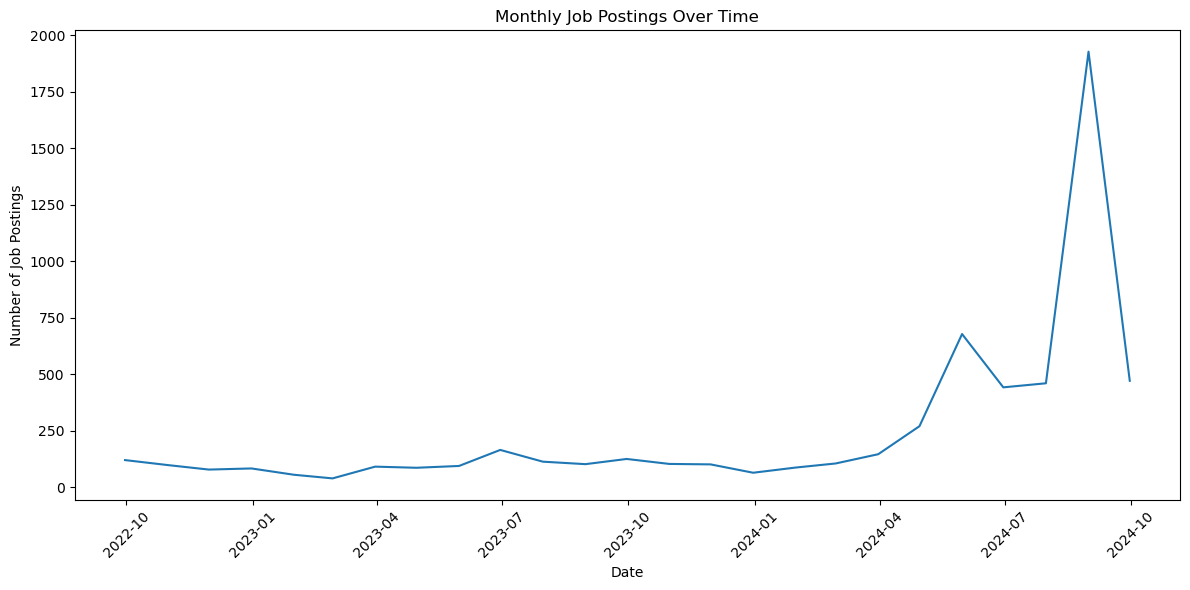

In [27]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample data to monthly frequency and plot
monthly_jobs = df.resample('M').size()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_jobs)
plt.title('Monthly Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

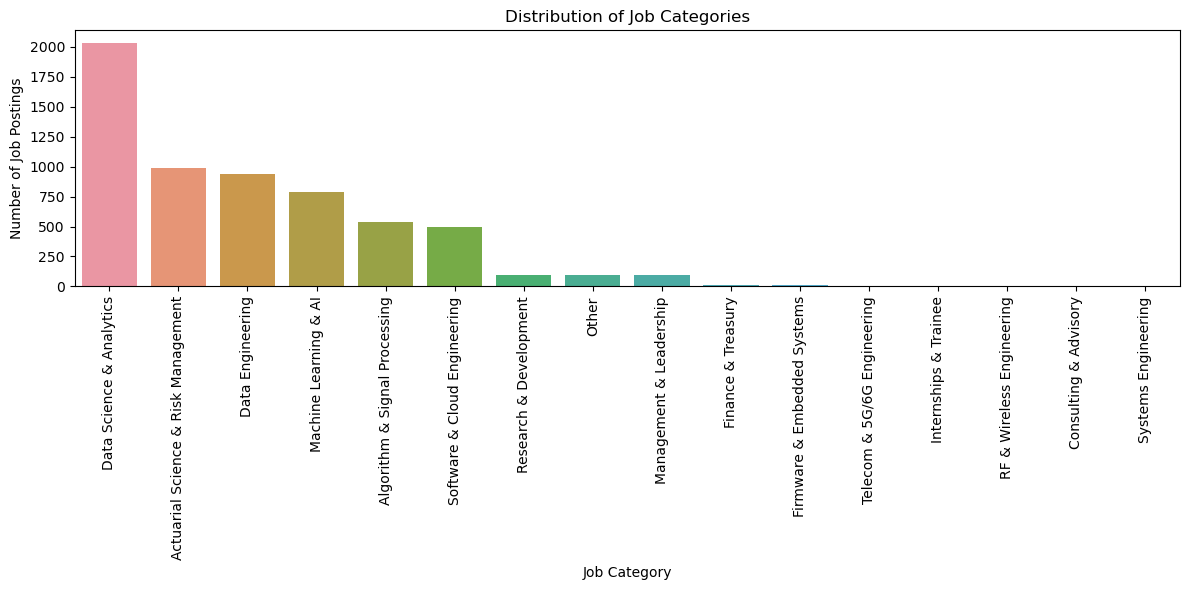

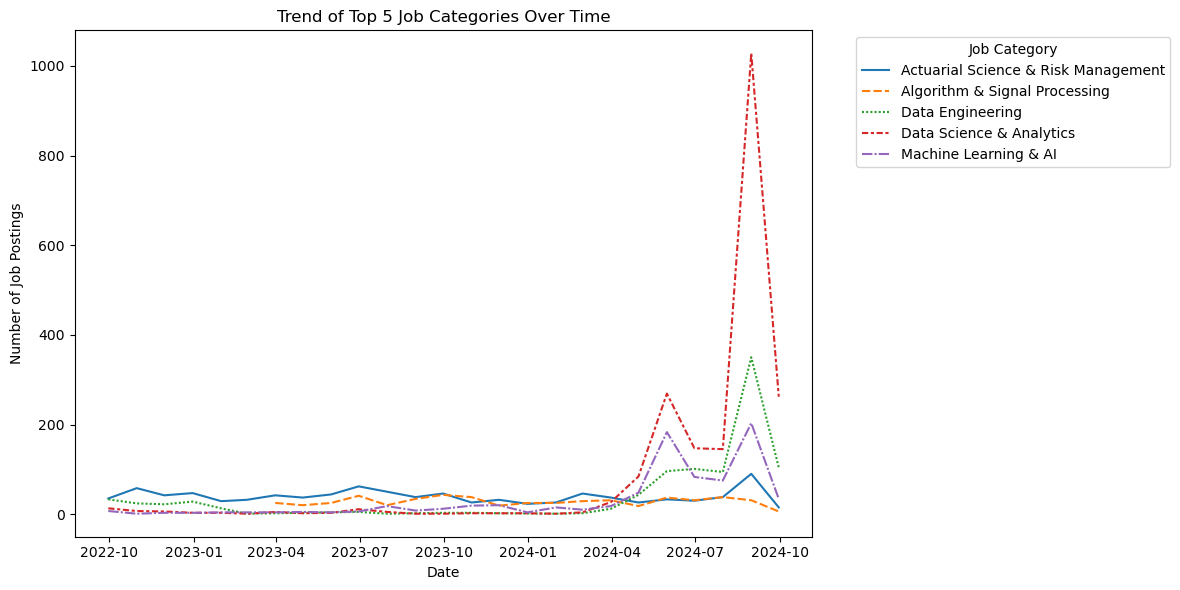

In [28]:
category_counts = df['job_category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Trend of top 5 categories over time
top_5_categories = category_counts.head().index
df_top5 = df[df['job_category'].isin(top_5_categories)]
df_top5_monthly = df_top5.groupby([pd.Grouper(freq='M'), 'job_category']).size().unstack()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top5_monthly)
plt.title('Trend of Top 5 Job Categories Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

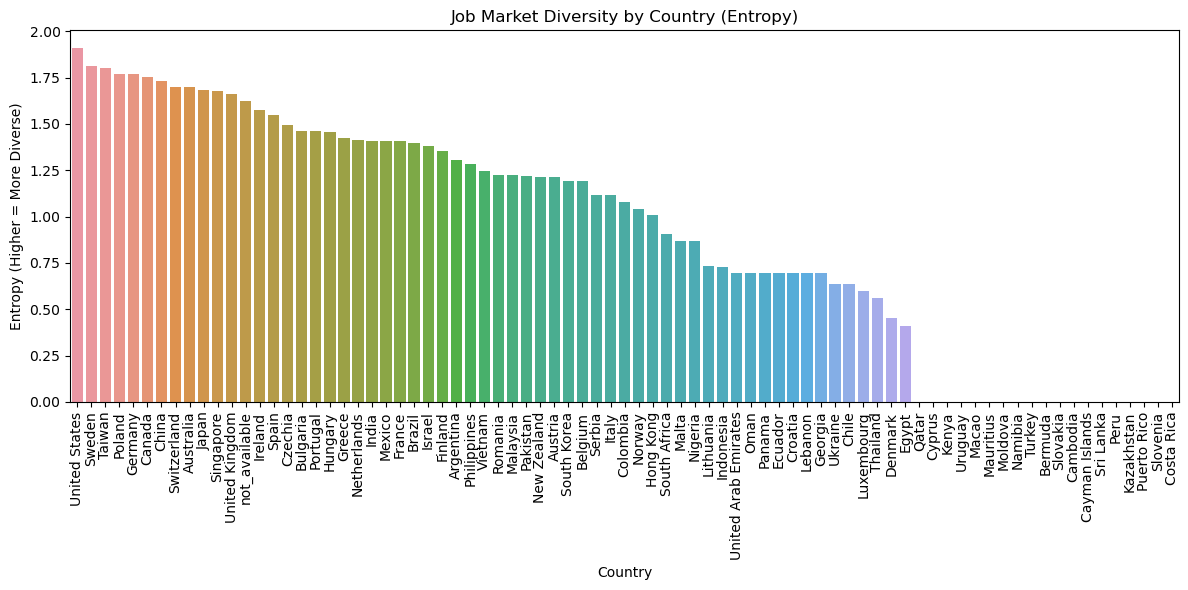

In [45]:
from scipy.stats import entropy

# Calculate job market concentration (entropy) for each country
country_job_dist = df.groupby('country')['job_category'].value_counts().unstack(fill_value=0)
country_entropy = country_job_dist.apply(entropy, axis=1).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_entropy.index, y=country_entropy.values)
plt.title('Job Market Diversity by Country (Entropy)')
plt.xlabel('Country')
plt.ylabel('Entropy (Higher = More Diverse)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

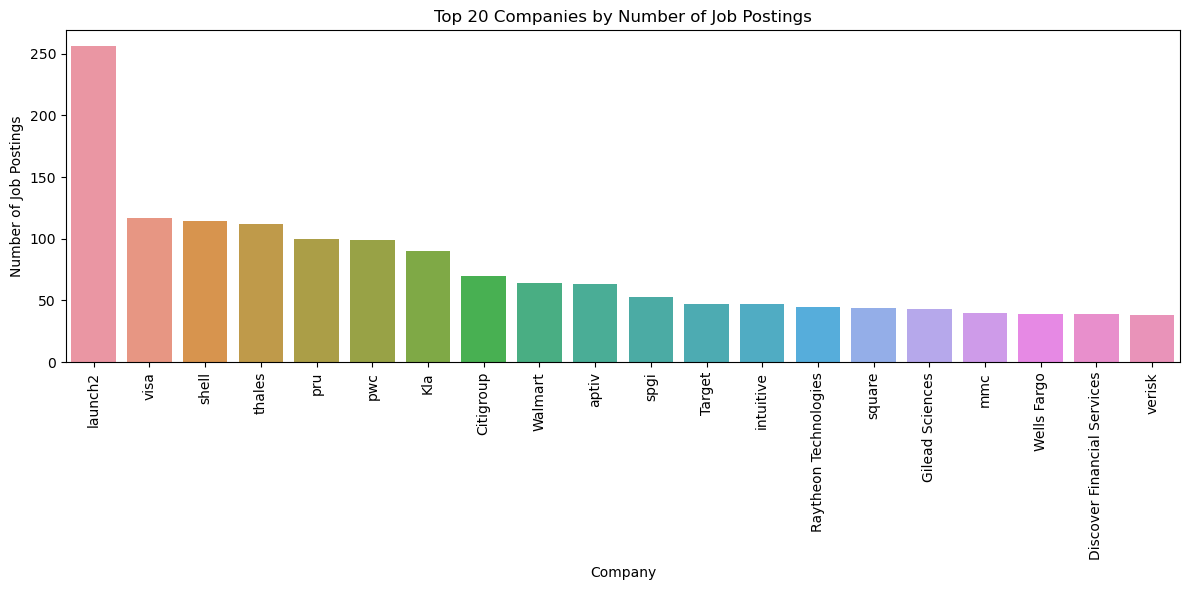

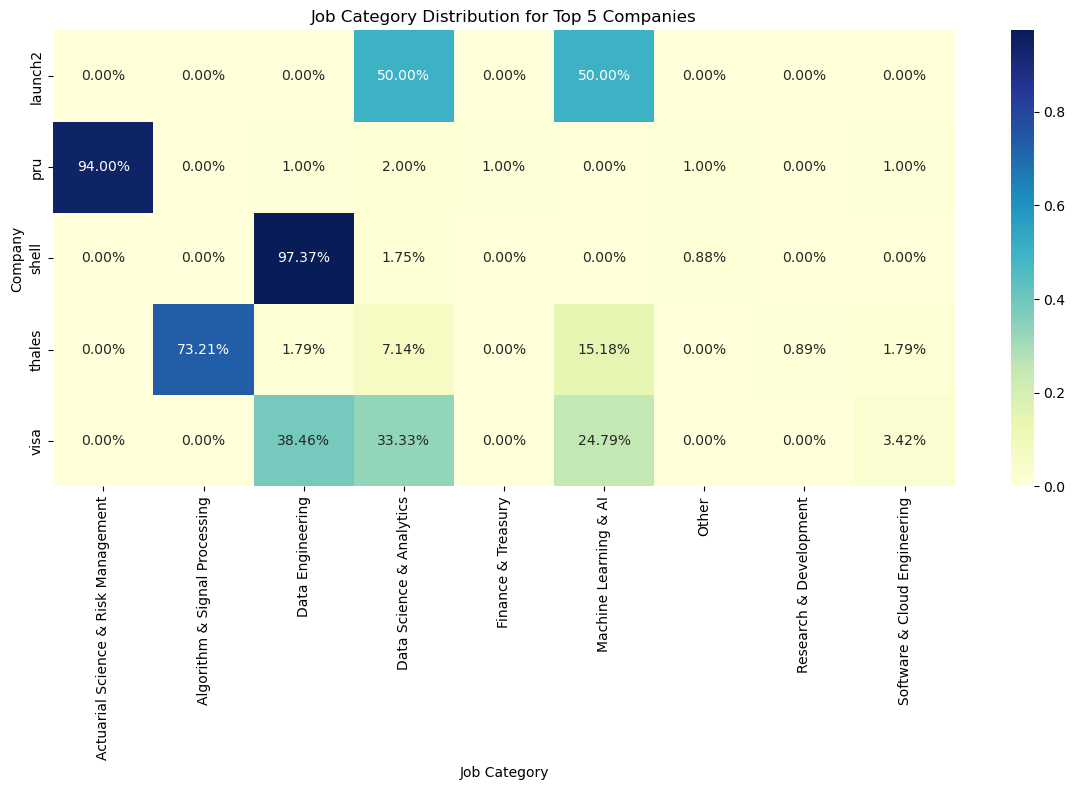

In [29]:
company_job_counts = df['company_name'].value_counts()
top_20_companies = company_job_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_companies.index, y=top_20_companies.values)
plt.title('Top 20 Companies by Number of Job Postings')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyze job category distribution for top 5 companies
top_5_companies = company_job_counts.head().index
df_top5_companies = df[df['company_name'].isin(top_5_companies)]
company_category_dist = df_top5_companies.groupby(['company_name', 'job_category']).size().unstack(fill_value=0)
company_category_dist_pct = company_category_dist.div(company_category_dist.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(company_category_dist_pct, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Job Category Distribution for Top 5 Companies')
plt.xlabel('Job Category')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahamm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


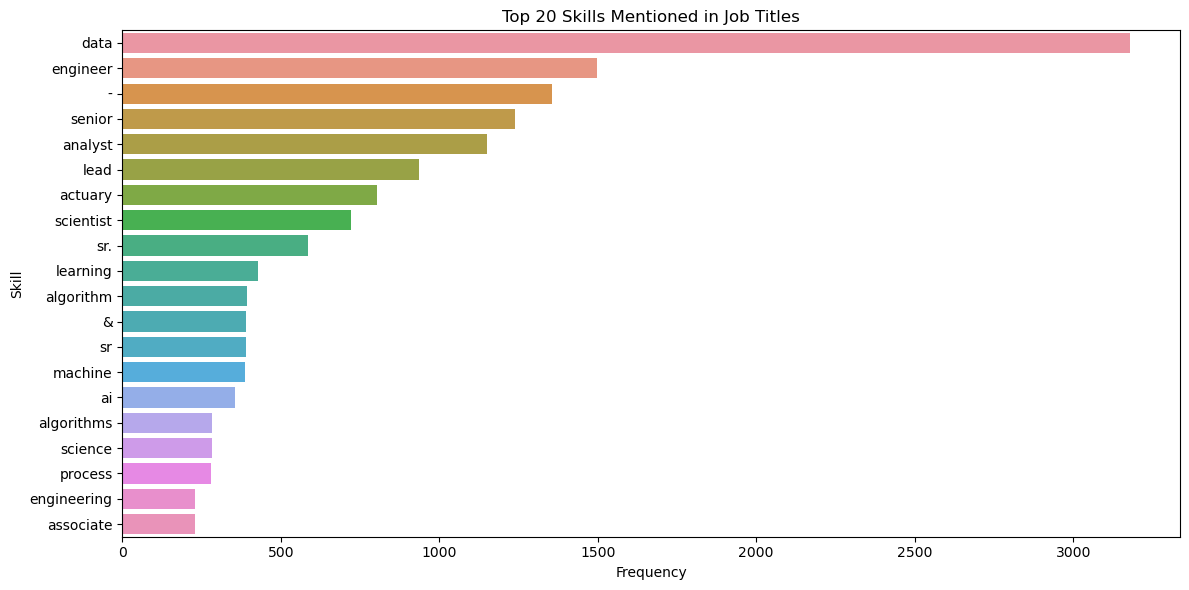

In [47]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def extract_skills(title):
    words = title.lower().split()
    return [word for word in words if word not in stop_words]

all_skills = [skill for title in df['job_title'] for skill in extract_skills(title)]
skill_freq = Counter(all_skills)

top_skills = pd.DataFrame(skill_freq.most_common(20), columns=['Skill', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Skill', data=top_skills)
plt.title('Top 20 Skills Mentioned in Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

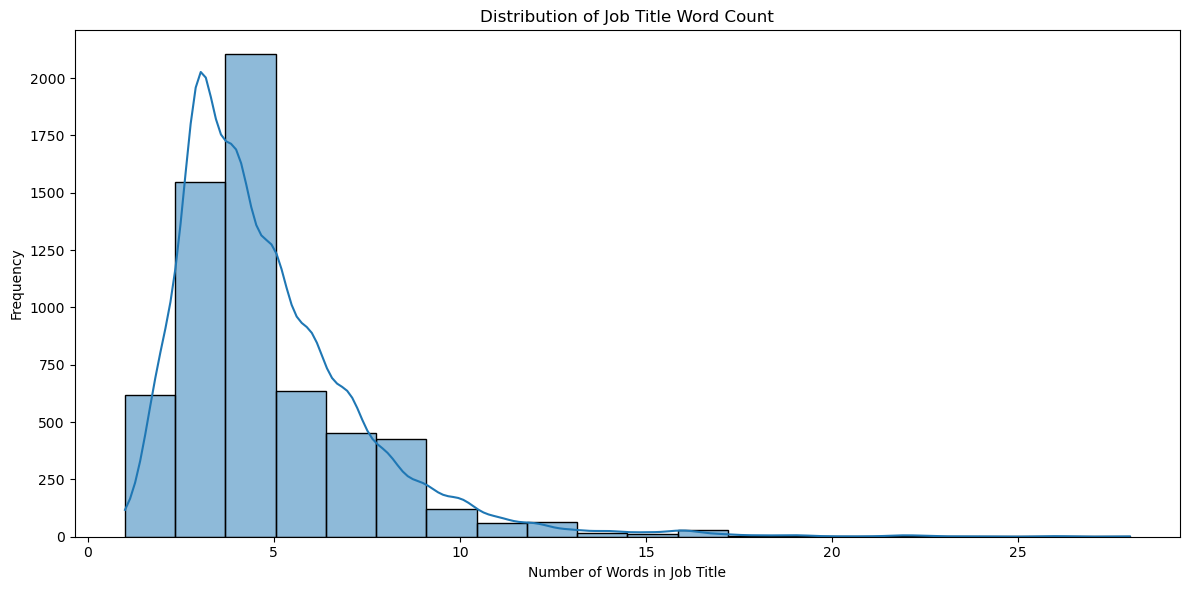

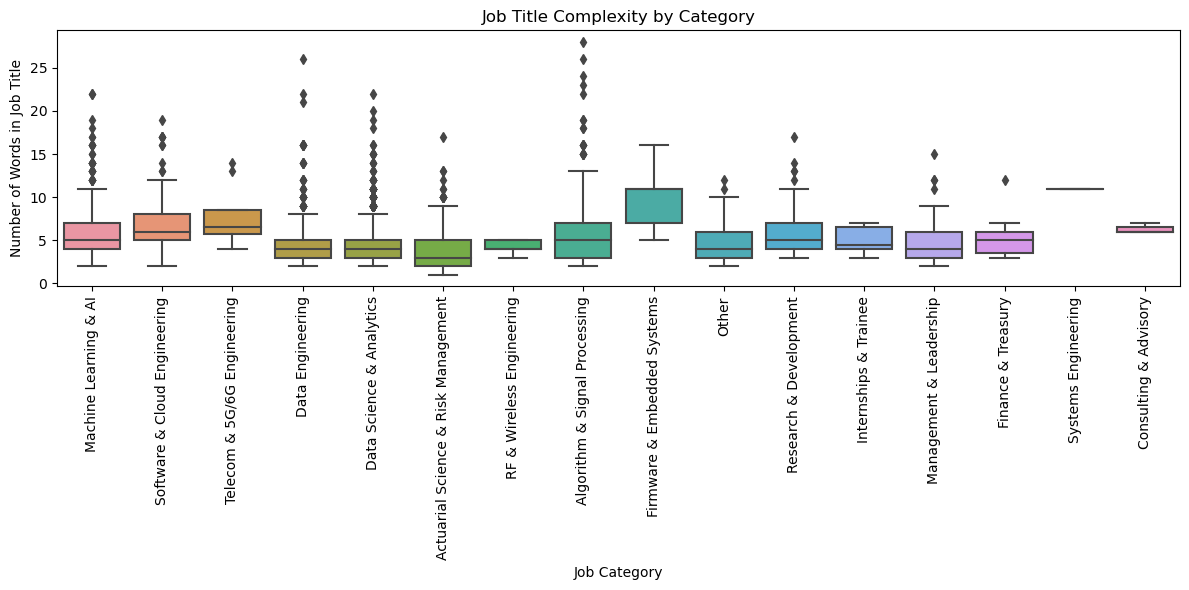

In [30]:
df['title_word_count'] = df['job_title'].str.count('\w+')

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='title_word_count', bins=20, kde=True)
plt.title('Distribution of Job Title Word Count')
plt.xlabel('Number of Words in Job Title')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Analyze relationship between title complexity and job category
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_category', y='title_word_count', data=df)
plt.title('Job Title Complexity by Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Words in Job Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

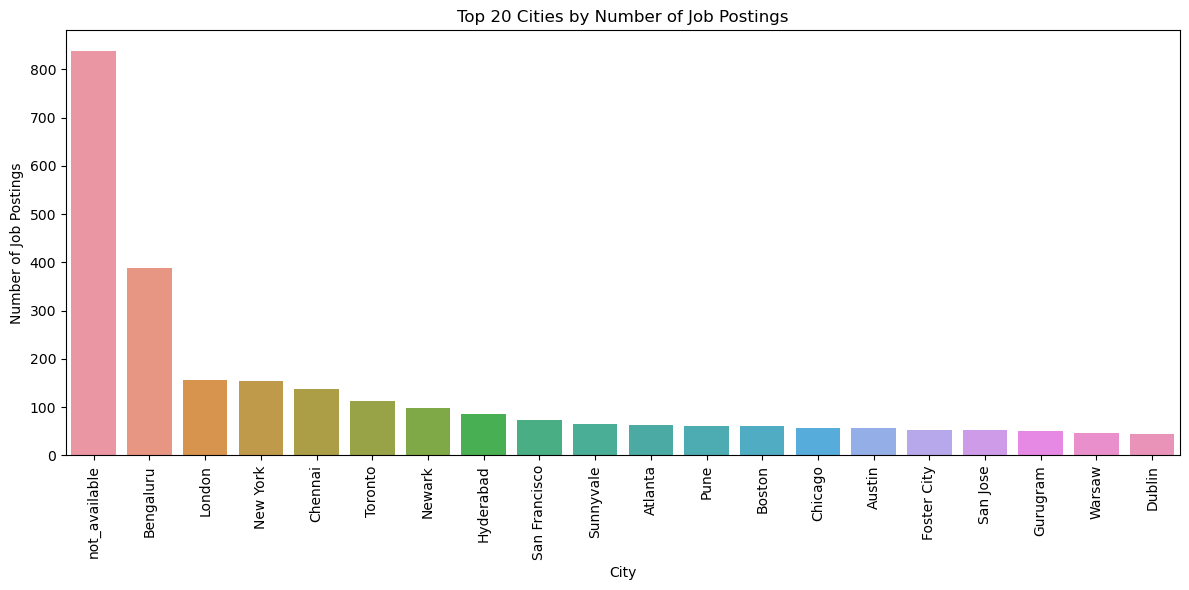

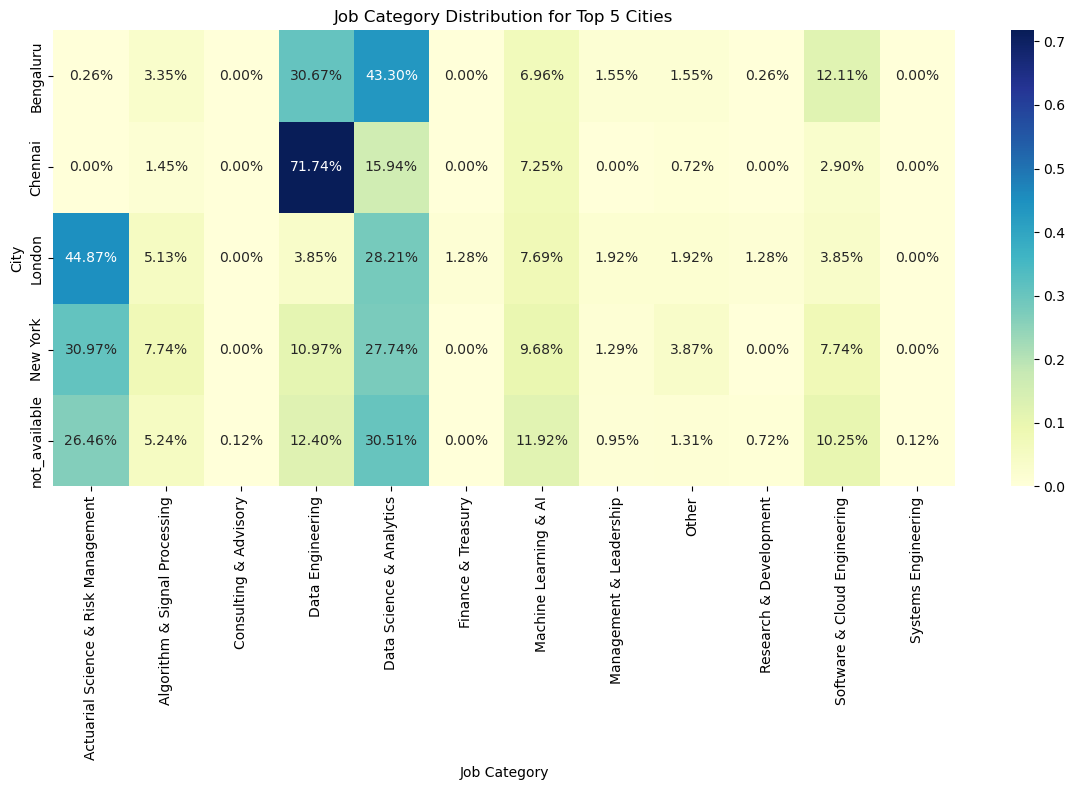

In [31]:
city_job_counts = df['city'].value_counts()
top_20_cities = city_job_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cities.index, y=top_20_cities.values)
plt.title('Top 20 Cities by Number of Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyze job category distribution for top 5 cities
top_5_cities = city_job_counts.head().index
df_top5_cities = df[df['city'].isin(top_5_cities)]
city_category_dist = df_top5_cities.groupby(['city', 'job_category']).size().unstack(fill_value=0)
city_category_dist_pct = city_category_dist.div(city_category_dist.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(city_category_dist_pct, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Job Category Distribution for Top 5 Cities')
plt.xlabel('Job Category')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [32]:
import geopandas as gpd
import requests
import io

In [33]:
import plotly.express as px

# Download world map data
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
r = requests.get(url)
world = gpd.read_file(io.BytesIO(r.content))
world = world.to_crs(epsg=4326)  # WGS 84

# Assuming df is your DataFrame containing job postings data
# Count job postings by country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['name', 'job_count']

# Calculate job percentage
total_jobs = country_counts['job_count'].sum()
country_counts['job_percentage'] = (country_counts['job_count'] / total_jobs) * 100

# Merge job counts with world map data
world = world.merge(country_counts, how='left', left_on='SOVEREIGNT', right_on='name')

# Create the map
fig = px.choropleth(world,
                    geojson=world.geometry.__geo_interface__,
                    locations=world.index,
                    color='job_count',
                    hover_name='name',
                    hover_data={'name': True, 'job_count': True, 'job_percentage': True},
                    color_continuous_scale='Blues',  # Changed to a color palette that is both visually appealing and clear
                    labels={'job_count': 'Number of Job Postings'},
                    title='Job Postings by Country')

# Update layout for better visual
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_font_size=20,
    title_font_family='Arial',
    title_font_color='darkblue',
    coloraxis_colorbar_title='Number of Job Postings',
    coloraxis_colorbar_tickprefix='',
    coloraxis_colorbar_ticks='outside'
)

# Add country names and job percentages with better visual alignment
annotations = []
for idx, row in world.iterrows():
    if row['job_count'] > 0:  # Only label countries with job postings
        annotations.append(dict(
            x=row.geometry.centroid.x,
            y=row.geometry.centroid.y,
            text=f"{row['name']}<br>{row['job_percentage']:.1f}%",
            showarrow=False,
            font=dict(size=10, color='black'),
            align='center'
        ))

# Update figure with annotations
fig.update_layout(annotations=annotations)

# Show the plot
fig.show()